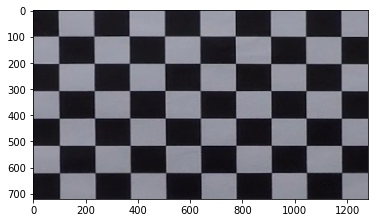

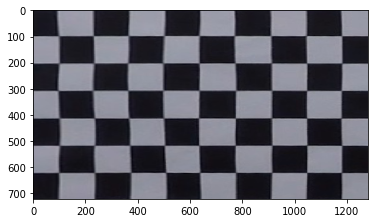

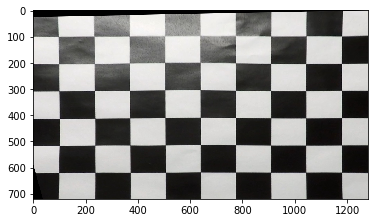

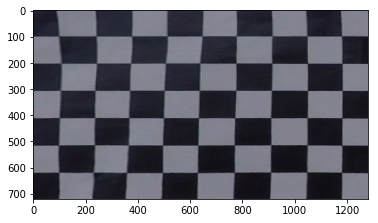

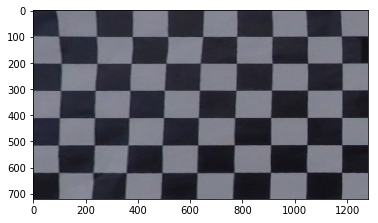

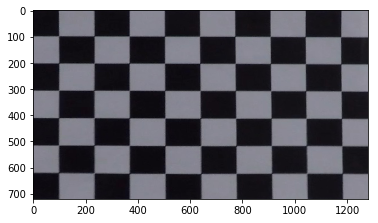

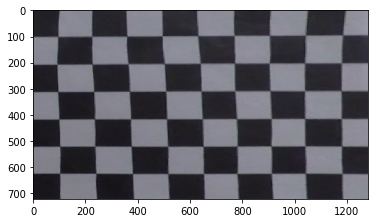

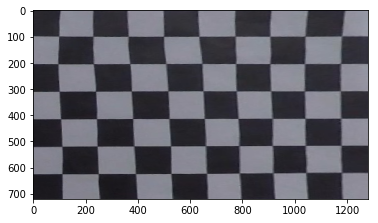

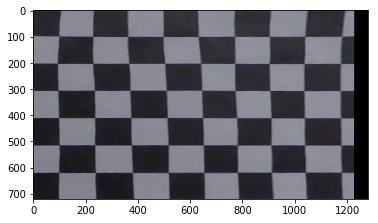

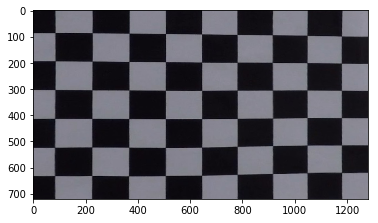

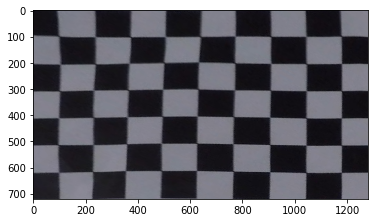

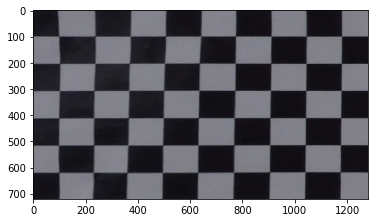

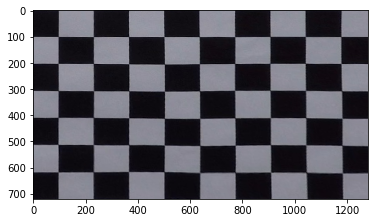

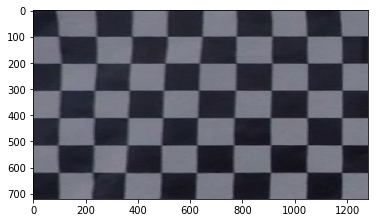

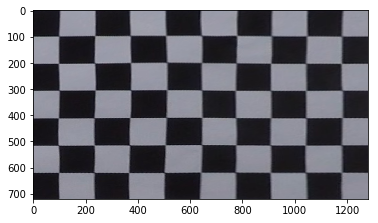

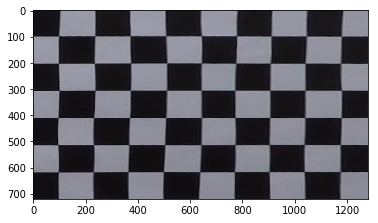

In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import glob

matplotlib.use('TkAgg')

%matplotlib inline
nx = 9
ny = 6
cal_images_folder_path = 'cal_images/calibration*'
def cal_camera(cal_images_folder_path):
    
    images = glob.glob(cal_images_folder_path)
    images_new = []
    # fig = None

    nx = 9
    ny = 6
    count = 0

    objpoints = []
    imgpoints = []
    for fname in images:
        img = mpimg.imread(fname)
        
        objp = np.zeros((ny*nx, 3), np.float32)
        objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

    #         img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    #         plt.imshow(img)
    #         plt.pause(.1)
            images_new.append(fname)
    #         if fig is None:
    #             fig = plt.imshow(img)
    #         else:
    #             fig.set_data(img)
    #         plt.pause(.1)
    #         plt.draw()
    #         plt.pause(.1)

    img = mpimg.imread(images[0])

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1],None,None)
    
    return ret, mtx, dist, rvecs, tvecs

def dis_correct(fname, ret, mtx, dist, rvecs, tvecs, show_img=True):
    img = mpimg.imread(fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    if(show_img == True):
        plt.imshow(undist)

images = glob.glob(cal_images_folder_path)
arr = cal_camera(cal_images_folder_path)


# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
fname_list = []
def corners_unwarp(fname, nx, ny, mtx, dist):
    img = mpimg.imread(fname)
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
        return warped, M
    else:
        fname_list.append(fname)
        return None, None

for fname in images_new:
    warped, M = corners_unwarp(fname, nx, ny, arr[1], arr[2])
    if warped is not None:
        plt.imshow(warped)
        plt.pause(.1)



In [65]:
print(fname_list)

['cal_images/calibration2.jpg']
